**Dataset Description**

| Variable   | Definition                            | Key                              |
|------------|---------------------------------------|----------------------------------|
| survival   | Survival                              | 0 = No, 1 = Yes                 |
| pclass     | Ticket class                          | 1 = 1st, 2 = 2nd, 3 = 3rd       |
| sex        | Sex                                   |                                  |
| Age        | Age in years                          |                                  |
| sibsp      | # of siblings/spouses aboard Titanic  |                                  |
| parch      | # of parents/children aboard Titanic  |                                  |
| ticket     | Ticket number                         |                                  |
| fare       | Passenger fare                        |                                  |
| cabin      | Cabin number                          |                                  |
| embarked   | Port of Embarkation                  | C = Cherbourg, Q = Queenstown, S = Southampton |


Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


Dataset Used: Titanic Dataset 

Dataset Link: https://www.kaggle.com/c/titanic/data

***Prepocessing***

**1.) Importing the required libraries and loading the dataset**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

**Loading the dataset** 



In [2]:
data=pd.read_csv(r'C:\Users\Devab\OneDrive\Desktop\Coding\Machine Learning\Applications\Applications using multiple algorithms\KNN-SVM-Logistic\train.csv')

In [ ]:
test_data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\Machine Learning\Applications\Applications using multiple algorithms\KNN-SVM-Logistic\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Concatenating the train and test data
data=pd.concat([data,test_data],axis=0)

<hr>

**2.) Exploring the dataset**

While performing this , we mainly check for the following 
        
> Missing values 

> Categorical Variables 

> Outliers 

> Co-relation between features

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

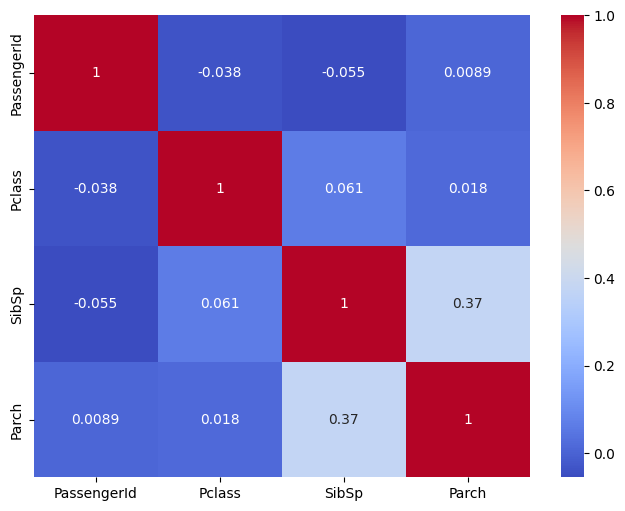

In [8]:
# Plotting the co-relation matrix
num_data=data.select_dtypes(include=['int64'])
corr_matrix=num_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

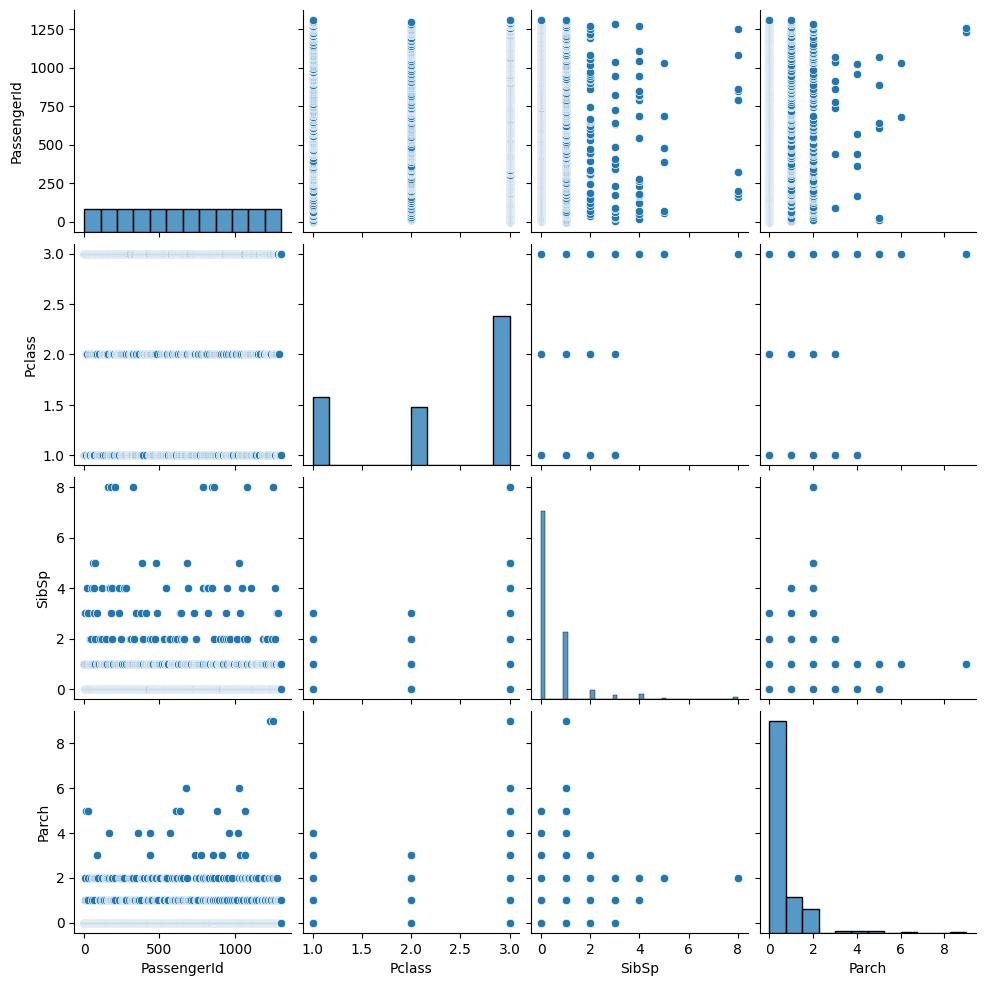

In [9]:
#  Checking for any outliers using pairplot

sns.pairplot(num_data)
plt.show()

# Observations 
# -> Outliers can be seen in the the columns Parch and SibSp
# -> We can visualise them more clearly by using boxplots of each of the columns

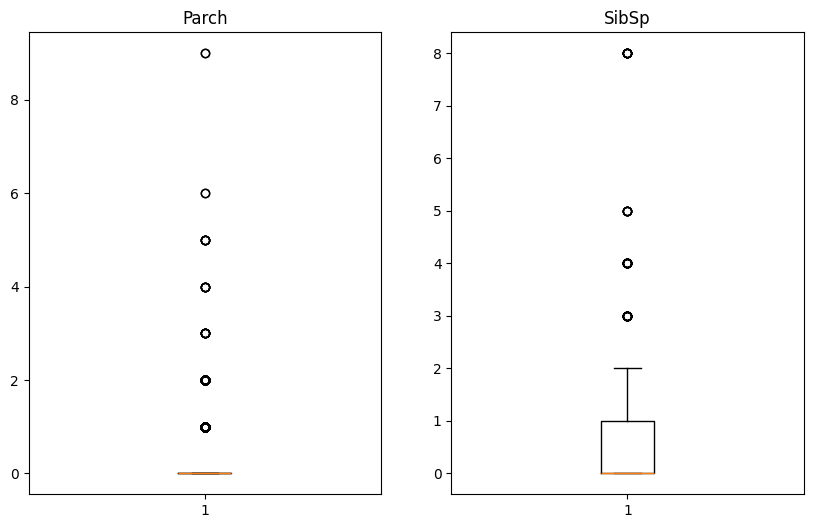

In [10]:
# Visualising the outliers present in parch and sibsp columns using boxplots 
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(data["Parch"])
plt.title("Parch")

plt.subplot(1,2,2)
plt.boxplot(data["SibSp"])
plt.title("SibSp")

plt.show()

<hr>


**3.) Cleaning the dataset** 

While performing this , we do the following things 

-> Remove unnecessary columns

-> Fill the missing values 

-> Encode thhe categorical data

-> Remove the outliers

-> Standardise or normalise the data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
# Removing the unnecessary columns which are not important for modelling
data_c=data.drop(columns=["Name","Cabin","PassengerId","Ticket","Fare"])

In [13]:
data_c.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3,male,22.0,1,0,S
1,1.0,1,female,38.0,1,0,C
2,1.0,3,female,26.0,0,0,S
3,1.0,1,female,35.0,1,0,S
4,0.0,3,male,35.0,0,0,S


In [14]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 81.8+ KB


In [15]:
data_c.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [16]:
# Imputing the missing values 
data_c["Age"]=data_c["Age"].fillna(data_c["Age"].mean())

# Dropping the missing values from the Embarked columns 
data_c=data_c.dropna()
data_c.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [17]:
# Encoding the categorical columns 

col=["Sex","Embarked"]
encoded_features=pd.DataFrame() 

# One-Hot encoding the sex column

from sklearn.preprocessing import OneHotEncoder 
encoder=OneHotEncoder(drop="first",sparse=False)

for column in col:
    encoded = encoder.fit_transform(data_c[[column]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]))
    encoded_features = pd.concat([encoded_features, encoded_df], axis=1)

# Drop original categorical columns from the dataset
data_c.drop(columns=col, inplace=True)
encoded_features=pd.concat([data_c,encoded_features],axis=1)


c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
encoded_features.isnull().sum()

Survived      2
Pclass        2
Age           2
SibSp         2
Parch         2
Sex_male      2
Embarked_Q    2
Embarked_S    2
dtype: int64

In [19]:
encoded_features=encoded_features.dropna()
encoded_features.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
# Removing the outliers

In [21]:
# Standardising the data 
from sklearn.preprocessing import StandardScaler 

scalable=encoded_features.drop(columns=["Survived"])
scaler=StandardScaler() 
data_scaled=scaler.fit_transform(scalable)
data_scaled=pd.DataFrame(data_scaled,columns=scalable.columns)

In [22]:
data_scaled.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,0.824903,-0.592766,0.429904,-0.474981,0.736620,-0.308321,0.617754
1,-1.574077,0.640358,0.429904,-0.474981,-1.357552,-0.308321,-1.618767
2,0.824903,-0.284485,-0.475856,-0.474981,-1.357552,-0.308321,0.617754
3,-1.574077,0.409147,0.429904,-0.474981,-1.357552,-0.308321,0.617754
4,0.824903,0.409147,-0.475856,-0.474981,0.736620,-0.308321,0.617754


<hr>

<hr>

***Model Selection and training***

**1.) Importing the necessary modules and models**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<hr>

**2.) Splitting the dats into train and test**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_scaled,encoded_features["Survived"],test_size=0.2,random_state=42)

<hr>

**3.) Fitting the models and training each model**

In [25]:
# Logistic regression
log_reg=LogisticRegression()

# KNN
knn= KNeighborsClassifier(n_neighbors=5)

# SVM
svm=SVC(kernel='linear')

In [26]:
# Fitting all the 3 models 
model_1=log_reg.fit(X_train, y_train)
model_2=knn.fit(X_train, y_train)
model_3=svm.fit(X_train, y_train)

<hr>
<hr>


***Model Evaluation***

**1.) Getting the predictions for each model**

In [27]:
# Getting the predictions 

y_pred_1=model_1.predict(X_test)
y_pred_2=model_2.predict(X_test)
y_pred_3=model_3.predict(X_test)

<hr>

**2.) Importing the evaluation metrics**

In [28]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,ConfusionMatrixDisplay,confusion_matrix

<hr>

**3.) Evaluating each model**

In [29]:
# Logistic Regression 

a_1=accuracy_score(y_test,y_pred_1)
p_1=precision_score(y_test,y_pred_1)
r_1=recall_score(y_test,y_pred_1)
f_1=f1_score(y_test,y_pred_1) 

In [30]:
print("accuracy score for logistic Regression: ",a_1)
print("Precision score for logistic Regression: ",p_1)
print("Recall score for logistic Regression: ",r_1)
print("f1 score for logistic Regression: ",f_1)

accuracy score for logistic Regression:  0.6348314606741573
Precision score for logistic Regression:  0.6078431372549019
Recall score for logistic Regression:  0.40789473684210525
f1 score for logistic Regression:  0.4881889763779528


In [31]:
# knn 
a_2=accuracy_score(y_test,y_pred_2)
p_2=precision_score(y_test,y_pred_2)
r_2=recall_score(y_test,y_pred_2)
f_2=f1_score(y_test,y_pred_2) 

In [32]:
print("accuracy score for logistic Regression: ",a_2)
print("Precision score for logistic Regression: ",p_2)
print("Recall score for logistic Regression: ",r_2)
print("f1 score for logistic Regression: ",f_2)

accuracy score for logistic Regression:  0.6685393258426966
Precision score for logistic Regression:  0.6491228070175439
Recall score for logistic Regression:  0.4868421052631579
f1 score for logistic Regression:  0.556390977443609


In [33]:
# SVM 
a_3=accuracy_score(y_test,y_pred_3)
p_3=precision_score(y_test,y_pred_3)
r_3=recall_score(y_test,y_pred_3)
f_3=f1_score(y_test,y_pred_3) 

In [34]:
print("accuracy score for logistic Regression: ",a_3)
print("Precision score for logistic Regression: ",p_3)
print("Recall score for logistic Regression: ",r_3)
print("f1 score for logistic Regression: ",f_3)

accuracy score for logistic Regression:  0.6235955056179775
Precision score for logistic Regression:  0.576271186440678
Recall score for logistic Regression:  0.4473684210526316
f1 score for logistic Regression:  0.5037037037037038


<hr>

**4.) Printing the confusion matrix for each model**

**Logistic Regression**

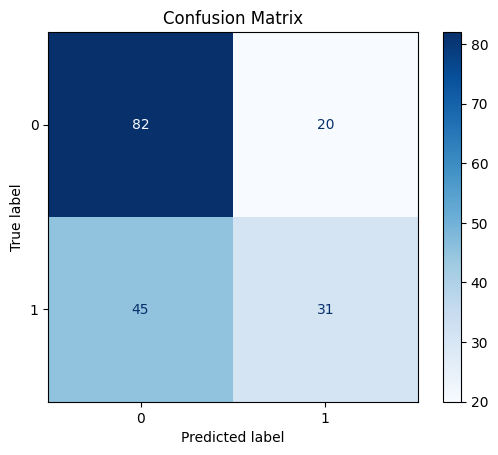

In [35]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_1)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**KNN**

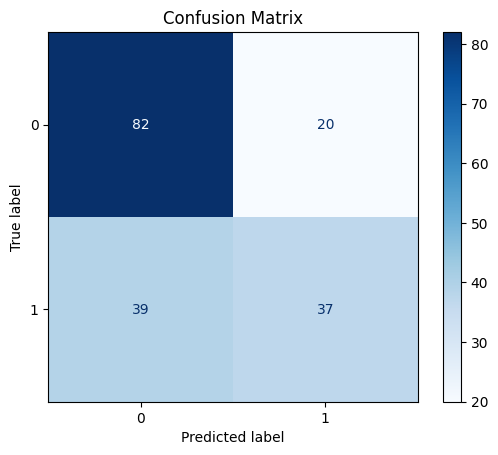

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**SVM**

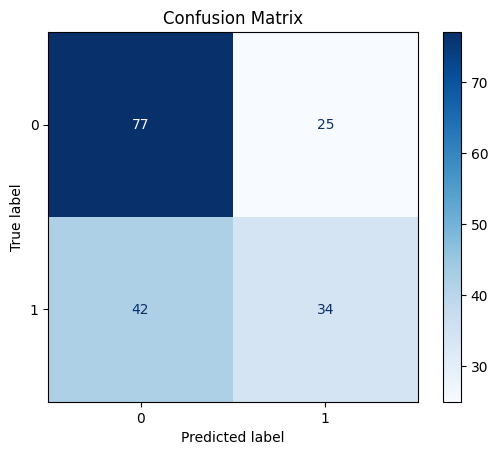

In [37]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_3)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<hr>
<hr>

***Visualising the model Evaluations***

**Compaing the models using metrix visualisation**

<Figure size 1000x600 with 0 Axes>

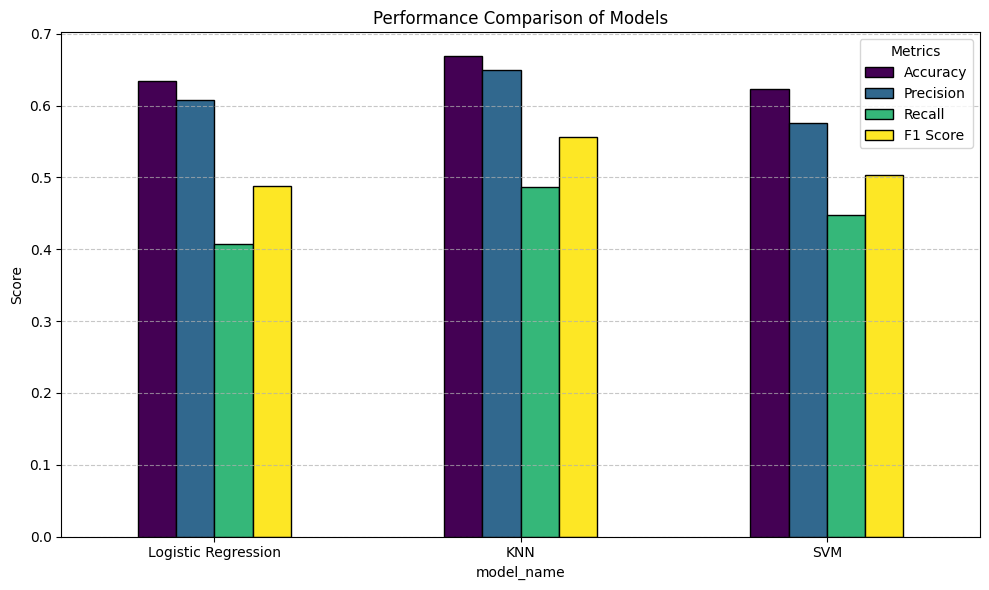

In [38]:
performance=[]
model1={"model_name":"Logistic Regression","Accuracy":a_1,"Precision": p_1,"Recall": r_1,"F1 Score": f_1} 
model2={"model_name":"KNN","Accuracy":a_2,"Precision": p_2,"Recall": r_2,"F1 Score": f_2} 
model3={"model_name":"SVM","Accuracy":a_3,"Precision": p_3,"Recall": r_3,"F1 Score": f_3} 
performance.append(model1)
performance.append(model2)
performance.append(model3)
perf=pd.DataFrame(performance)
plt.figure(figsize=(10, 6))
perf.set_index("model_name").plot(kind="bar", figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
